# EDA of training data

This dataset is pretty simple and doesn't have much to explore with EDA, but let's perform some anyway just to see if there's anything interesting with the data. 

### Imports

(and data setup)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
train_df = pd.read_csv("./data/train.csv")
train_df.head()

,Id,label
0,560,glass
1,4675,cup
2,875,glass
3,4436,spoon
4,8265,plate


Let's see what the unique labels are.

In [3]:
train_df['label'].unique()

array(['glass', 'cup', 'spoon', 'plate', 'knife', 'fork'], dtype=object)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      5559 non-null   int64 
 1   label   5559 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.0+ KB


Our train dataset has 6000 images in total. 

Let's modify the dataframe to inlcude path's to the actual images so we can access and load them. 

In [11]:
train_df['image'] = train_df['Id'].map(lambda x: f'{x:0>4}.jpg')
train_df.head()

,Id,label,image
0,560,glass,0560.jpg
1,4675,cup,4675.jpg
2,875,glass,0875.jpg
3,4436,spoon,4436.jpg
4,8265,plate,8265.jpg


Now we can use this later to load the images. Let's see how many images of each category we have in the training data.

In [5]:
df_sorted = train_df.groupby(['label']).count().reset_index()
df_sorted.columns=['label', 'count']
df_sorted = df_sorted.sort_values(by='count')
df_sorted

,label,count
1,fork,557
2,glass,742
3,knife,909
5,spoon,989
0,cup,1135
4,plate,1227


<AxesSubplot: xlabel='label', ylabel='count'>

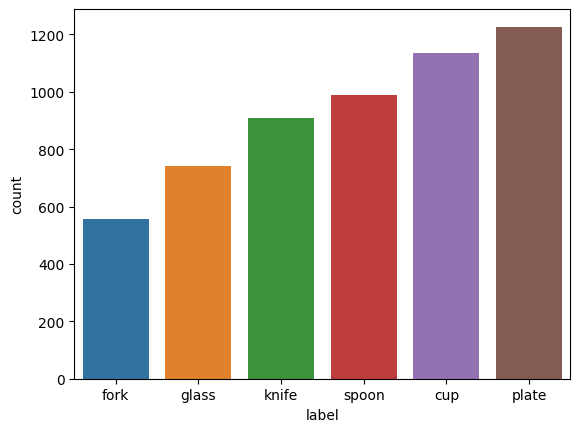

In [6]:
sns.barplot(x=df_sorted['label'], y=df_sorted['count'])

A lot of plates and cups, apparently.

We can also see that the lowest category still has more than 500 images, so we don't need to drop any due to lack of training data. 

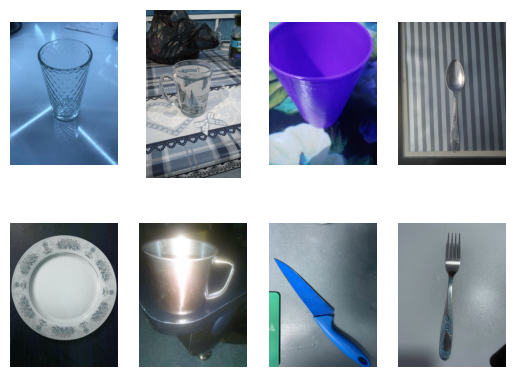

In [17]:
for i in range(8):
    img = cv2.imread('./data/images/' + train_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

Let's try viewing some images with the same labels.

In [22]:
knife_df = train_df[train_df['label'] == 'knife'].reset_index()
cup_df = train_df[train_df['label'] == 'cup'].reset_index()
glass_df = train_df[train_df['label'] == 'glass'].reset_index()
plate_df = train_df[train_df['label'] == 'plate'].reset_index()
spoon_df = train_df[train_df['label'] == 'spoon'].reset_index()
fork_df = train_df[train_df['label'] == 'fork'].reset_index()



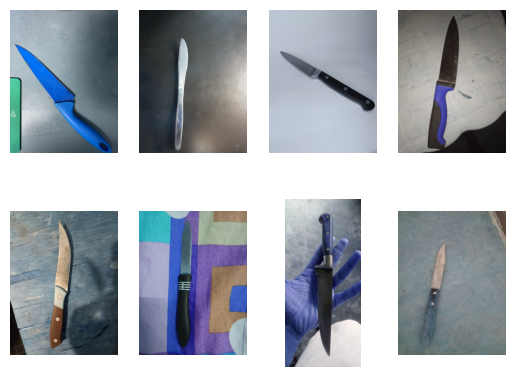

In [24]:
for i in range(8):
    img = cv2.imread('./data/images/' + knife_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

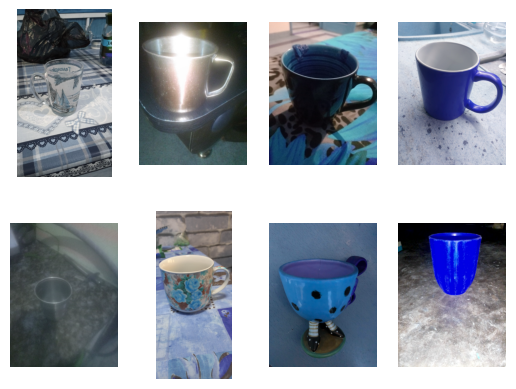

In [25]:
for i in range(8):
    img = cv2.imread('./data/images/' + cup_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

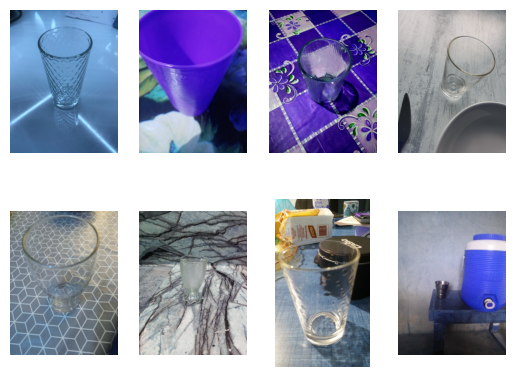

In [26]:
for i in range(8):
    img = cv2.imread('./data/images/' + glass_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

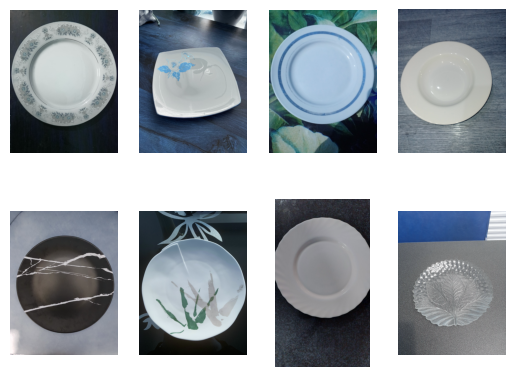

In [27]:
for i in range(8):
    img = cv2.imread('./data/images/' + plate_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

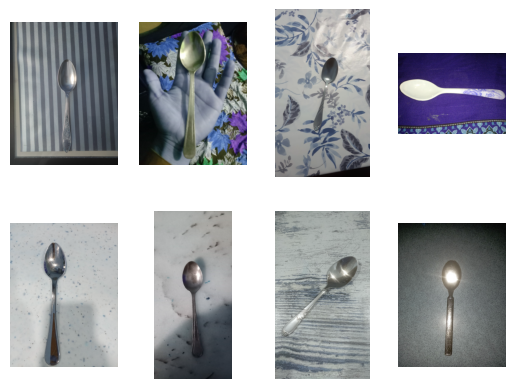

In [28]:
for i in range(8):
    img = cv2.imread('./data/images/' + spoon_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

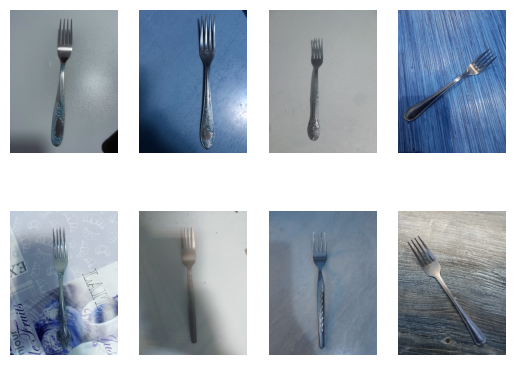

In [29]:
for i in range(8):
    img = cv2.imread('./data/images/' + fork_df['image'][i])

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(img)

Even with just a quick look we can see a good deal of variety in the images we have. This is good as the model should be getting lots of variety.